In [ ]:
import matplotlib.pyplot as plt
import numpy as np

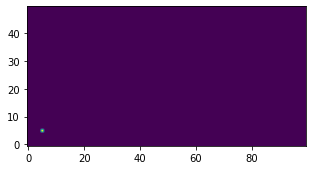

In [2]:
H = 50
W = 100
size_square = 10
width_road = 2
area = np.zeros((H,W))
area[5,5]=1

fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(area,origin="lower")

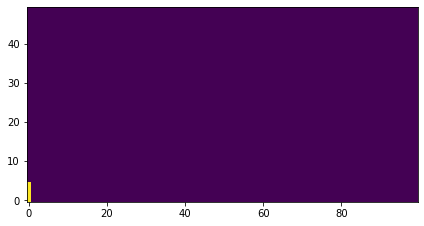

In [5]:
fig,ax = plt.subplots(figsize=(7,5))
area = np.zeros((H,W))
area[:5,0]=1
ax.imshow(area,origin="lower")

In [6]:
from random import randrange

max_height = int(H/size_square)
max_width = int(W/size_square)

squares = np.zeros((max_height, max_width))
square0 = (0, 0)
c1 = [-1, 0, 1]  # y
c2 = [0, 1]  # x

squares[square0] = 1
trajectory = [square0]


def approachable_squares(square, squares, max_h, max_w):
    y, x = square
    return [(y+dy, x+dx) for dy in c1 for dx in c2 if 0 <= y+dy < max_h and 0 <= x+dx < max_w and squares[y+dy, x+dx] == 0]


def choose_square(s):
    return s[randrange(0, len(s))]


In [7]:
square = square0
num_step = 1
while sqs := approachable_squares(square, squares, max_height, max_width):

    square = choose_square(sqs)
    # print(coord)
    num_step += 1
    squares[square] = num_step
    trajectory.append(square)
    # print(trajectory)
squares


array([[ 1.,  3.,  0.,  6.,  7.,  0.,  0., 10.,  0., 14.],
       [ 2.,  0.,  4.,  5.,  0.,  8.,  9., 11.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

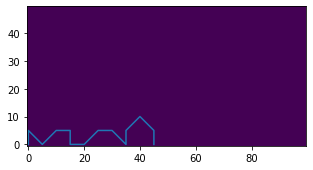

In [8]:
yy = [y*5 for y, x in trajectory]
xx = [x*5 for y, x in trajectory]

fig, ax = plt.subplots(figsize=(5, 5))
area = np.zeros((H,W))
ax.imshow(area,origin="lower")
ax.plot(xx, yy)


In [9]:
trajectory

[(0, 0),
 (1, 0),
 (0, 1),
 (1, 2),
 (1, 3),
 (0, 3),
 (0, 4),
 (1, 5),
 (1, 6),
 (0, 7),
 (1, 7),
 (2, 8),
 (1, 9),
 (0, 9)]

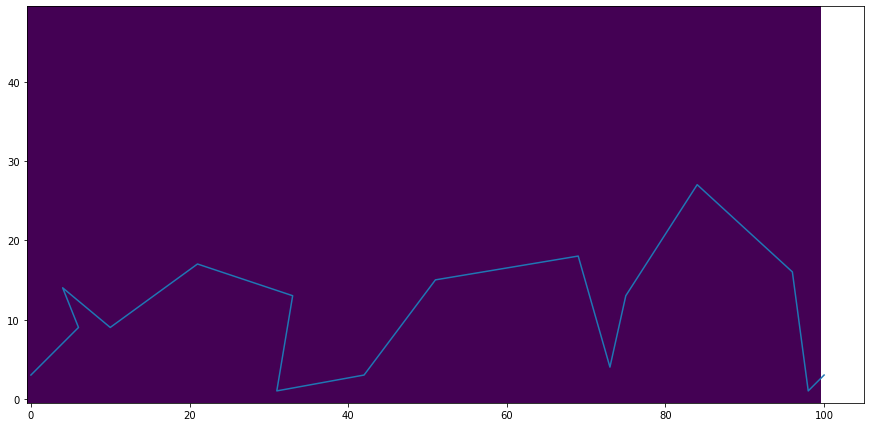

In [10]:
#  start
turning_points= [(3, 0)]
# y = [randrange(0,size_square)+step[0]*size_square for step in trajectory]
# x = [randrange(0,size_square)+step[1]*size_square for step in trajectory]

# between start and finish
# step (2,1) = (y,x)
for step in trajectory:
    turning_points.append((randrange(0, size_square) +
                step[0]*size_square, randrange(0, size_square)+step[1]*size_square))

#  finish
if trajectory[-1][0] == 0:
    turning_points.append((3, W))
else:
    turning_points.append((H-3,W))

fig, ax = plt.subplots(figsize=(15, 15))
area = np.zeros((H,W))
ax.imshow(area, origin="lower")

y = [step[0] for step in turning_points]
x = [step[1] for step in turning_points]
ax.plot(x, y)


In [11]:
turning_points

[(3, 0),
 (9, 6),
 (14, 4),
 (9, 10),
 (17, 21),
 (13, 33),
 (1, 31),
 (3, 42),
 (15, 51),
 (18, 69),
 (4, 73),
 (13, 75),
 (27, 84),
 (16, 96),
 (1, 98),
 (3, 100)]

In [12]:
lines = (line for line in zip(turning_points,turning_points[1:]))
list(lines)

[((3, 0), (9, 6)),
 ((9, 6), (14, 4)),
 ((14, 4), (9, 10)),
 ((9, 10), (17, 21)),
 ((17, 21), (13, 33)),
 ((13, 33), (1, 31)),
 ((1, 31), (3, 42)),
 ((3, 42), (15, 51)),
 ((15, 51), (18, 69)),
 ((18, 69), (4, 73)),
 ((4, 73), (13, 75)),
 ((13, 75), (27, 84)),
 ((27, 84), (16, 96)),
 ((16, 96), (1, 98)),
 ((1, 98), (3, 100))]

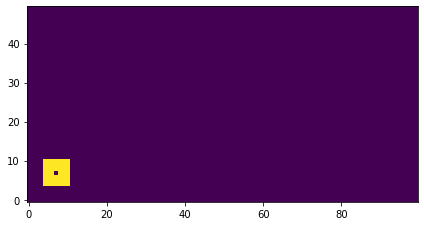

In [13]:
def around(point, area, width):
    y, x = point

    y1 = max(y-width, 0)
    y2 = min(y+width, H)

    x1 = max(x-width, 0)
    x2 = min(x+width, W)

    area[y1:y2+1, x1:x2+1] = 1

area = np.zeros((H, W))

point = (7, 7)  # (y, x)

around(point, area, 3)
area[point] = 0

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(area, origin="lower")


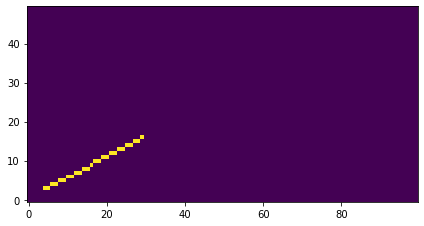

In [14]:
def connect_points(p1, p2):
    y1, x1 = p1
    y2, x2 = p2

    num_steps = max(abs(y2 - y1), abs(x2 - x1))

    step_y = (y2-y1)/num_steps
    step_x = (x2-x1)/num_steps

    line_points = [(int(y1+step_y*i), int(x1+step_x*i)) for i in range(num_steps)]

    return line_points


p1 = (3, 4)
p2 = (17, 30)

line_points = connect_points(p1, p2)

area = np.zeros((H, W))

ys = []
xs = []

for y, x in line_points:
    ys.append(y)
    xs.append(x)

area[ys, xs] = 1

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(area, origin="lower")


In [15]:
def make_path(turning_points):

    path = []
    
    for p1, p2 in zip(turning_points, turning_points[1:]):
        line_points = connect_points(p1, p2)
        path.extend(line_points)

    return path

area = np.zeros((H, W))
path = make_path(turning_points)
path[:7]


[(3, 0), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5), (9, 6)]

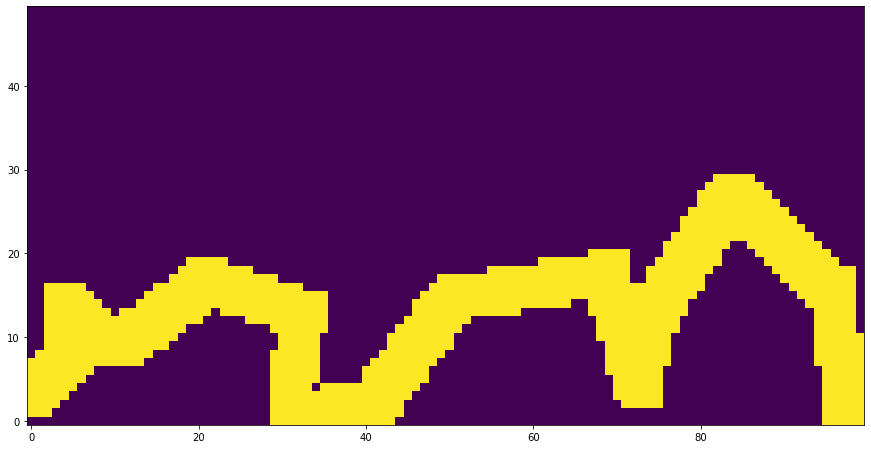

In [16]:
def build_road(path, area, width):
    for point in path:
        around(point, area, width)

area = np.zeros((H, W))
build_road(path, area, width_road)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(area, origin="lower")

(50, 100)
(60, 100)


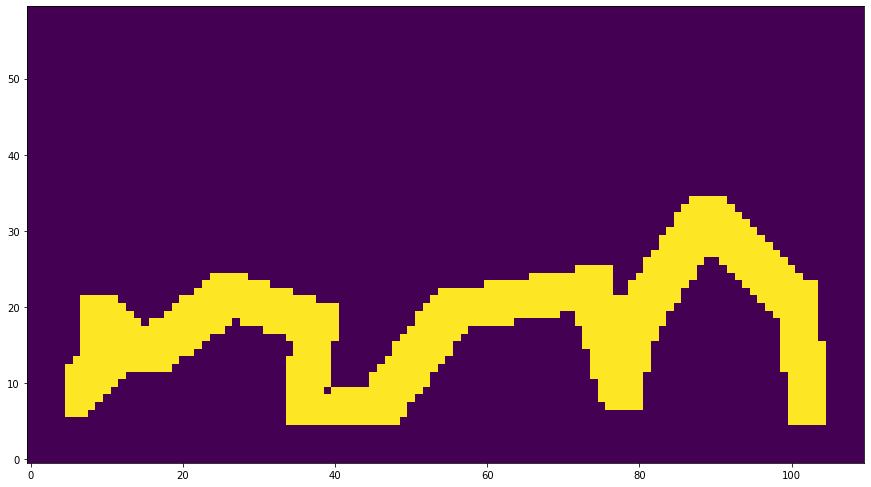

In [17]:
padding = 5

pad_y = np.zeros((padding, W))
print(area.shape)
area = np.vstack([pad_y, area, pad_y])

print(area.shape)

pad_x = np.zeros((H+2*padding, padding))
area = np.hstack([pad_x, area, pad_x])

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(area, origin="lower")


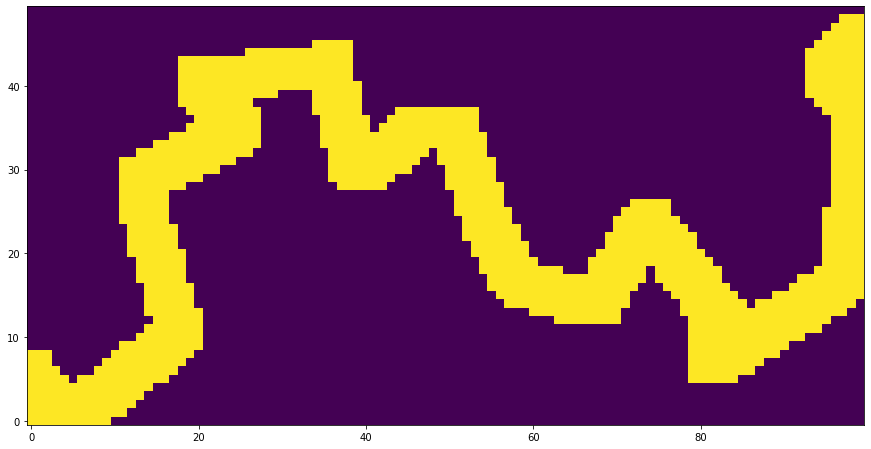

In [19]:
def generate_road(H = 50, W =100, size_square = 10, width_road = 2, padding = 5):
    max_height = int(H/size_square)
    max_width = int(W/size_square)

    squares = np.zeros((max_height, max_width))
    square0 = (0, 0)
    c1 = [-1, 0, 1]  # y
    c2 = [0, 1]  # x

    squares[square0] = 1
    trajectory = [square0]

    square = square0
    num_step = 1
    
    while sqs := approachable_squares(square, squares, max_height, max_width):
        square = choose_square(sqs)
        num_step += 1
        squares[square] = num_step
        trajectory.append(square)
        
    # старт
    turning_points= [(randrange(0, size_square), 0)]

    for step in trajectory:
        turning_points.append((randrange(0, size_square) +
                    step[0]*size_square, randrange(0, size_square)+step[1]*size_square))
    
    #  finish
    if trajectory[-1][0] == 0:
        turning_points.append((3, W))
    else:
        turning_points.append((H-3,W))

    path = make_path(turning_points)
    area = np.zeros((H, W))
    
    build_road(path, area, width_road)

    # pad_y = np.zeros((padding,W))
    # area = np.vstack([pad_y, area, pad_y])

    # pad_x = np.zeros((H+2*padding,padding))
    # area = np.hstack([pad_x, area, pad_x])

    return area

area = generate_road()

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(area, origin="lower")  